In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('once')
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")


In [ ]:
carseats.data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Estudio descriptivo

In [ ]:
carseats_data = carseats.data

In [ ]:
carseats_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


[]

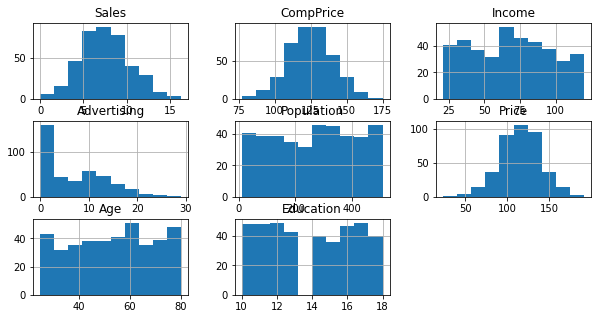

In [ ]:
carseats_data.hist(figsize=(10,5))
plt.plot()

In [ ]:
corr = carseats_data.corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


# Variables categoricas

In [ ]:
import seaborn as sns

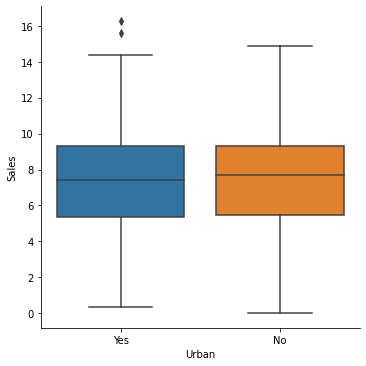

In [ ]:
sns.catplot(data=carseats_data, y='Sales', x='Urban', kind='box')

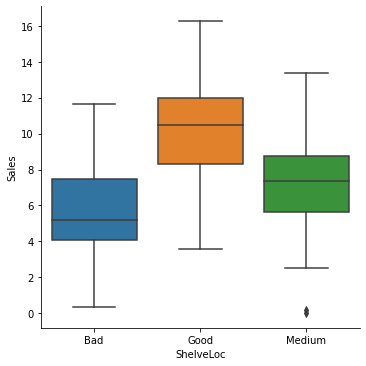

In [ ]:
sns.catplot(data=carseats_data, y='Sales', x='ShelveLoc', kind='box')

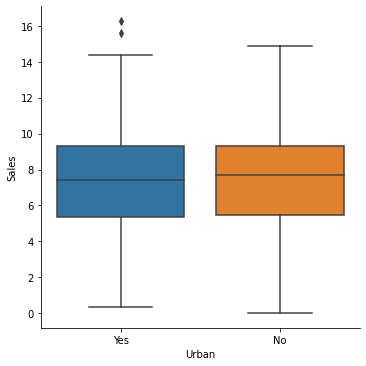

In [ ]:
sns.catplot(data=carseats_data, y='Sales', x='Urban', kind='box')

In [ ]:
carseats_data["US"].unique()

array(['Yes', 'No'], dtype=object)

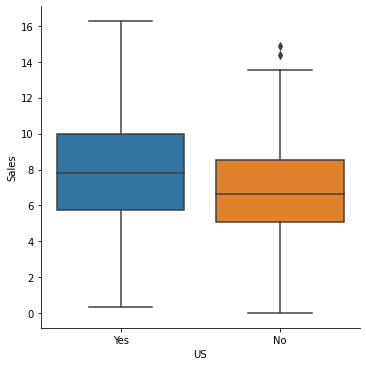

In [ ]:
sns.catplot(data=carseats_data, y='Sales', x='US', kind='box')

# variable dicotomica ventas_altas

In [ ]:
carseats_data["ventas_altas"] = np.where(carseats_data.Sales > 8,1,0);

# Arbol de clasificacion

In [ ]:
#dividiendo el dataset
x = carseats_data[['CompPrice', 'Income',	'Advertising', 'Population', 	'Price',	'Age', 	'Education', 'Urban', 'US']]
y = carseats_data['ventas_altas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [ ]:
#tamanio de dataset de entrenamiento
x_train.shape

(320, 9)

In [ ]:
#tamanio de dataset de pruebas
x_test.shape

(80, 9)

In [ ]:
##transformando las variables categoricas
cat_cols = x_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()

In [ ]:
print(f"Variables categoricas: {cat_cols}")
print(f"Variables numericas: {numeric_cols}")

Variables categoricas: ['Urban', 'US']
Variables numericas: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [64]:
preprocessor = ColumnTransformer(
    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)], remainder = 'passthrough'
    )

#D

In [68]:
x_train_raw = preprocessor.fit_transform(x_train)

In [69]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
3,117,100,4,466,97,55,14,Yes,Yes
18,110,110,0,408,68,46,17,No,Yes
202,121,78,4,413,130,46,10,No,Yes
250,137,105,10,435,156,72,14,Yes,Yes
274,135,93,2,67,119,34,11,Yes,Yes


In [70]:
columns_names = ["urban_no", "urban_yes", "US_no", "US_yes", 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 

In [72]:
x_train_data = pd.DataFrame(x_train_raw, columns=columns_names)
x_train_data.head()

,urban_no,urban_yes,US_no,US_yes,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.0,1.0,0.0,1.0,117.0,100.0,4.0,466.0,97.0,55.0,14.0
1,1.0,0.0,0.0,1.0,110.0,110.0,0.0,408.0,68.0,46.0,17.0
2,1.0,0.0,0.0,1.0,121.0,78.0,4.0,413.0,130.0,46.0,10.0
3,0.0,1.0,0.0,1.0,137.0,105.0,10.0,435.0,156.0,72.0,14.0
4,0.0,1.0,0.0,1.0,135.0,93.0,2.0,67.0,119.0,34.0,11.0


# Entrenando el modelo

In [74]:
clf = DecisionTreeClassifier(
    max_depth = 5,
    criterion='gini'
)

clf = clf.fit(x_train_data, y_train)

In [75]:
predictions = clf.predict(x_train_data)

[Text(143.30454545454546, 199.32, 'X[8] <= 92.5\ngini = 0.479\nsamples = 320\nvalue = [193, 127]'),
 Text(60.872727272727275, 163.07999999999998, 'X[4] <= 101.0\ngini = 0.292\nsamples = 45\nvalue = [8, 37]'),
 Text(20.290909090909093, 126.83999999999999, 'X[5] <= 75.0\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(10.145454545454546, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(30.436363636363637, 90.6, 'X[8] <= 80.0\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(20.290909090909093, 54.359999999999985, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(40.581818181818186, 54.359999999999985, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(30.436363636363637, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(50.727272727272734, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(101.45454545454547, 126.83999999999999, 'X[4] <= 137.0\ngini = 0.165\nsamples = 33\nvalue = [3, 30]'),
 Text(91.30909090909091, 90.6, '

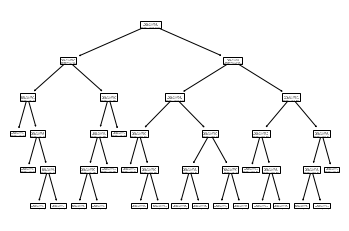

In [76]:
plot_tree(clf)

In [79]:
# aplicamos transformacion en el dataset de prueba

x_test_raw = preprocessor.fit_transform(x_test)
x_test_data = pd.DataFrame(x_test_raw, columns=columns_names)
x_test_data.head()

,urban_no,urban_yes,US_no,US_yes,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1.0,0.0,0.0,1.0,98.0,21.0,11.0,326.0,90.0,76.0,11.0
1,0.0,1.0,0.0,1.0,121.0,86.0,10.0,496.0,145.0,51.0,10.0
2,0.0,1.0,0.0,1.0,114.0,38.0,13.0,317.0,128.0,50.0,16.0
3,1.0,0.0,0.0,1.0,125.0,41.0,2.0,357.0,123.0,47.0,14.0
4,0.0,1.0,1.0,0.0,145.0,30.0,0.0,67.0,104.0,55.0,17.0


In [80]:
x_test_data.shape

(80, 11)

In [81]:
predictions = clf.predict(x_test_data)

In [84]:
acc = accuracy_score(y_test, predictions)
print(f"El modelo tiene {acc*100}% del Accuracy en el set de datos de prueba")

El modelo tiene 66.25% del Accuracy en el set de datos de prueba


#Agregado al problema

In [85]:
from sklearn.metrics import plot_confusion_matrix

In [86]:
confusion_matrix(y_test, predictions)

array([[29, 14],
       [13, 24]])

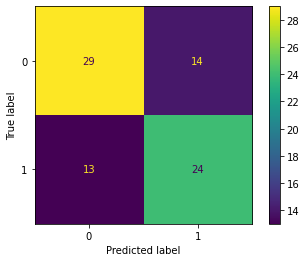

In [87]:
plot_confusion_matrix(clf, x_test_data, y_test)

# G)

In [89]:
importances = clf.feature_importances_
indices = np.argsort(importances)

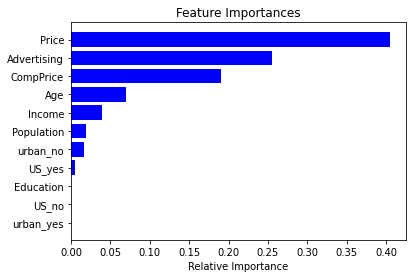

In [92]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# segun el grafico anterior, lo mas influyente es el precio.